In [1]:
import einops
import torch
import numpy as np
import glob
from PIL import Image
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
torch.manual_seed(42)
np.random.seed(42)

In [3]:
from models.TransUNet.dataloader import build_the_dataloader

main_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/company_target_images",
    mask_path="/home/student/Documents/Xrays/Data/company_target_masks/",
    name="main_targets"
)

jenya_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/jenya_target_images",
    mask_path="/home/student/Documents/Xrays/Data/jenya_target_masks",
    name="jenya_targets"
)

sg_dataloader = build_the_dataloader(
    batch_size=1,
    img_path="/home/student/Documents/Xrays/Data/strange_gun_images_targets",
    mask_path="/home/student/Documents/Xrays/Data/strange_gun_masks_targets",
    name="strange_gun"
)

Try to load data from f/home/student/Documents/Xrays/Data/company_target_images
Number of images: 58
Number of masks: 58

Volume of test dataset: 58

Try to load data from f/home/student/Documents/Xrays/Data/jenya_target_images
Number of images: 35
Number of masks: 35

Volume of test dataset: 35

Try to load data from f/home/student/Documents/Xrays/Data/strange_gun_images_targets
Number of images: 6
Number of masks: 6

Volume of test dataset: 6



In [4]:
from dashboard import Board

def render_fn(x):
    x = x.detach().clone()  # hey, it's really important
    x = einops.rearrange(x, "b c h w -> (b c h) w", b=1, c=1)
    x *= 255
    x = x.to(torch.uint8)
    x = np.array(x.cpu())
    
    return x

In [5]:
from models.TransUNet.model import MyTransUNet, build_the_model

models = glob.glob("models/TransUNet/P_vit12_vitdim512_overlayer/*.meow")

def fs(name):
    return int(name[len('models/TransUNet/P_vit12_vitdim512_overlayer/transunet_'):-len('epo_bce_vit12_vitdim512.meow')])

models = sorted(glob.glob("models/TransUNet/P_vit12_vitdim512_overlayer/*.meow"), key=fs)
models

['models/TransUNet/P_vit12_vitdim512_overlayer/transunet_10epo_bce_vit12_vitdim512.meow',
 'models/TransUNet/P_vit12_vitdim512_overlayer/transunet_20epo_bce_vit12_vitdim512.meow',
 'models/TransUNet/P_vit12_vitdim512_overlayer/transunet_30epo_bce_vit12_vitdim512.meow',
 'models/TransUNet/P_vit12_vitdim512_overlayer/transunet_40epo_bce_vit12_vitdim512.meow',
 'models/TransUNet/P_vit12_vitdim512_overlayer/transunet_50epo_bce_vit12_vitdim512.meow']

Trainable parameters amount: 88071035
Try to form a storage with 58 objects from dataloader. Device: cuda:0
Try to form a storage with 35 objects from dataloader. Device: cuda:0
Try to form a storage with 6 objects from dataloader. Device: cuda:0
Storages has been formed
Render...


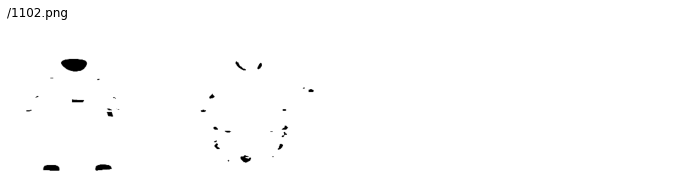

Measure...
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Trainable parameters amount: 88071035
Try to form a storage with 58 objects from dataloader. Device: cuda:0
Try to form a storage with 35 objects from dataloader. Device: cuda:0
Try to form a storage with 6 objects from dataloader. Device: cuda:0
Storages has been formed
Render...


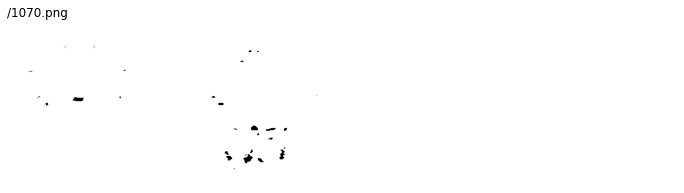

Measure...
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Trainable parameters amount: 88071035
Try to form a storage with 58 objects from dataloader. Device: cuda:0
Try to form a storage with 35 objects from dataloader. Device: cuda:0
Try to form a storage with 6 objects from dataloader. Device: cuda:0
Storages has been formed
Render...


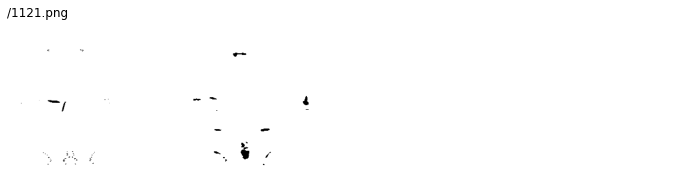

Measure...
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Trainable parameters amount: 88071035
Try to form a storage with 58 objects from dataloader. Device: cuda:0
Try to form a storage with 35 objects from dataloader. Device: cuda:0
Try to form a storage with 6 objects from dataloader. Device: cuda:0
Storages has been formed
Render...


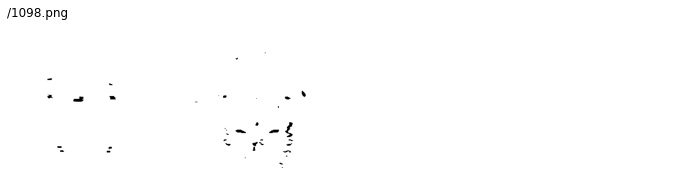

Measure...
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Trainable parameters amount: 88071035
Try to form a storage with 58 objects from dataloader. Device: cuda:0
Try to form a storage with 35 objects from dataloader. Device: cuda:0
Try to form a storage with 6 objects from dataloader. Device: cuda:0
Storages has been formed
Render...


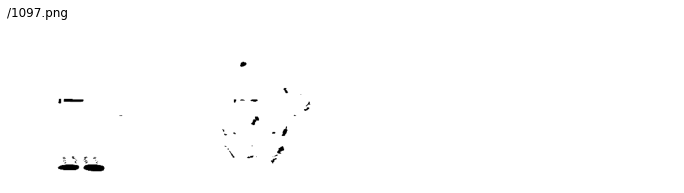

Measure...
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py
Load IoU interface from metrics/IoU.py


In [6]:
for model_path in models:
    
    model = build_the_model(
        device="cuda",
        model_path=model_path
    )

    model_name = model_path[len("models/TransUNet/Parameters/"):-len(".meow")] + "_threshold"


    board = Board(
        dataloaders=[            # dataloader returns tuple of any types objects
            main_dataloader,
            jenya_dataloader,
            sg_dataloader
        ],
        model=model,            # model returns object that go right in the measure() and
                                # go in the render() wrapped with render_fn
        model_name=model_name,  # name of the model
        render_fn=render_fn,
        render_dl_idx=0,        # index of dataloader we need to render
        obj_item=1,             # index of element in tuple from dataloader that will be rendered
        obj_name_item=2,        # index of filename
        to_model_item=0,        # image
        limit=1,               # amount of rendered objects
        phs_in_row=2,           # amount of rendered objects in row
        get_randomly=False,     # it's usefull if dataloader is big and 
                                # we want to get different :limit: object from it to render  
        c=3,
        inverse_modelled_obj=True
    )
    
    report = board.run()
    
    # board.view(report)
    board.dump(report, y=True)
    
    del board
    del model

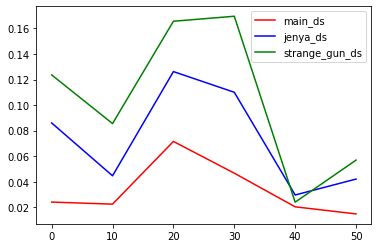

In [7]:
# 256
with open("storage.json", "r") as json_file:
    data = json.load(json_file)
    
data = {k:v for k,v in data.items() if "vit4" in k}

render_data = {}

for epo, (k,v) in enumerate(data.items()):
    if "_threshold" in k:
        render_data[epo*10] = (
            v['main_targets']['IoU']['mean'],
            v['jenya_targets']['IoU']['mean'],
            v['strange_gun']['IoU']['mean']
        )
        
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

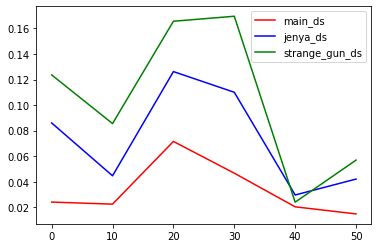

In [8]:
# 256
with open("storage.json", "r") as json_file:
    data = json.load(json_file)
    
data = {k:v for k,v in data.items() if "vit4" in k}

render_data = {}

for epo, (k,v) in enumerate(data.items()):
    if "_threshold" in k:
        render_data[epo*10] = (
            v['main_targets']['IoU']['mean'],
            v['jenya_targets']['IoU']['mean'],
            v['strange_gun']['IoU']['mean']
        )
        
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

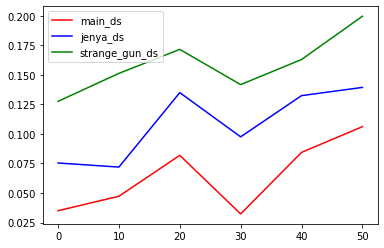

In [7]:
# 256
with open("storage.json", "r") as json_file:
    data = json.load(json_file)
    
render_data = {}

for epo, (k,v) in enumerate(data.items()):
    if "_threshold" in k:
        render_data[epo*10] = (
            v['main_targets']['IoU']['mean'],
            v['jenya_targets']['IoU']['mean'],
            v['strange_gun']['IoU']['mean']
        )
        
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

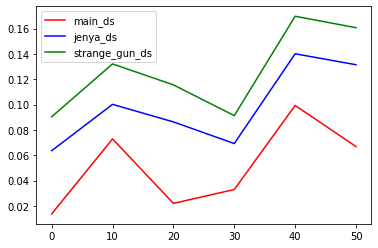

In [7]:
# 256
with open("storage.json", "r") as json_file:
    data = json.load(json_file)
    
data = {k:v for k,v in data.items() if "vit12" in k}

render_data = {}

for epo, (k,v) in enumerate(data.items()):
    if "_threshold" in k:
        render_data[epo*10] = (
            v['main_targets']['IoU']['mean'],
            v['jenya_targets']['IoU']['mean'],
            v['strange_gun']['IoU']['mean']
        )
        
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

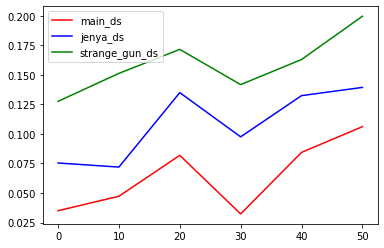

In [14]:
# 256
with open("storage.json", "r") as json_file:
    data = json.load(json_file)
    
data = {k:v for k,v in data.items() if "512" in k}
    
render_data = {}

for epo, (k,v) in enumerate(data.items()):
    if "_threshold" in k:
        render_data[epo*10] = (
            v['main_targets']['IoU']['mean'],
            v['jenya_targets']['IoU']['mean'],
            v['strange_gun']['IoU']['mean']
        )
        
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

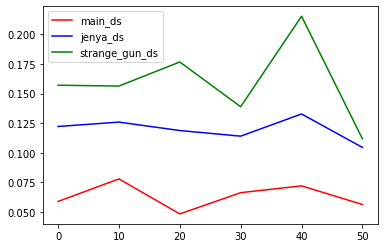

In [8]:
# 256
with open("storage.json", "r") as json_file:
    data = json.load(json_file)
    
data = {k:v for k,v in data.items() if "1024" in k}
    
render_data = {}

for epo, (k,v) in enumerate(data.items()):
    if "_threshold" in k:
        render_data[epo*10] = (
            v['main_targets']['IoU']['mean'],
            v['jenya_targets']['IoU']['mean'],
            v['strange_gun']['IoU']['mean']
        )
        
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

In [9]:
render_data

{0: (0.006440747529268265, 0.012895071879029274, 0.01683972217142582),
 10: (0.013439124450087547, 0.03634133189916611, 0.08071842044591904),
 20: (0.019003020599484444, 0.04302222654223442, 0.08396802097558975),
 30: (0.03517632558941841, 0.06815125793218613, 0.12708379328250885),
 40: (0.05691414698958397, 0.09952273964881897, 0.1624889224767685),
 50: (0.04279566556215286, 0.07894852012395859, 0.13869838416576385),
 60: (0.06576213240623474, 0.10236253589391708, 0.16791288554668427),
 70: (0.07816719263792038, 0.11866505444049835, 0.18971915543079376),
 80: (0.0731988400220871, 0.10863117128610611, 0.16585813462734222),
 90: (0.09766817837953568, 0.12482613325119019, 0.1815715879201889),
 100: (0.03498106822371483, 0.05870739370584488, 0.10878559201955795),
 110: (0.08443296700716019, 0.128279447555542, 0.18268771469593048),
 120: (0.11490550637245178, 0.13827702403068542, 0.21459980309009552),
 130: (0.11260367929935455, 0.14072678983211517, 0.2144988775253296),
 140: (0.1044170856

In [16]:
report

{'transunet_200epo_bce_vit8_threshold': {'main_targets': {'IoU': {'mean': 0.10290329903364182}},
  'jenya_targets': {'IoU': {'mean': 0.14931444823741913}},
  'strange_gun': {'IoU': {'mean': 0.19236330687999725}}}}

In [17]:
with open("storage.json", "r") as json_file:
    data = json.load(json_file)

In [31]:
render_data = {}

for epo, (k,v) in enumerate(data.items()):
    if "_threshold" in k:
        render_data[epo*10] = (
            v['main_targets']['IoU']['mean'],
            v['jenya_targets']['IoU']['mean'],
            # v['strange_gun']['IoU']['mean']
        )

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

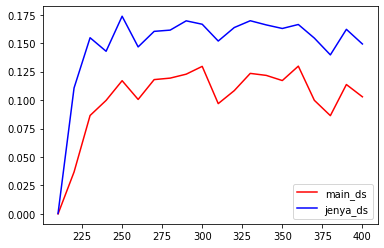

In [33]:
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
# sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

In [14]:
render_data[150]

(0.13195130228996277, 0.14888007938861847, 0.21901345252990723)

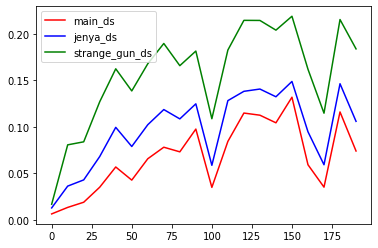

In [22]:
sns.lineplot(x=render_data.keys(), y=[i[0] for i in render_data.values()], color="red", label="main_ds")
sns.lineplot(x=render_data.keys(), y=[i[1] for i in render_data.values()], color="blue", label="jenya_ds")
sns.lineplot(x=render_data.keys(), y=[i[2] for i in render_data.values()], color="green", label="strange_gun_ds")
plt.legend()

In [26]:
render_data[150]

(0.13195130228996277, 0.14888007938861847)

In [24]:
np.argmax([i[0] for i in render_data.values()]), np.argmax([i[1] for i in render_data.values()]), np.argmax([i[2] for i in render_data.values()])

(15, 15, 15)

In [11]:
render_data

{0: (0.006440747529268265, 0.012895071879029274, 0.01683972217142582),
 10: (0.013439124450087547, 0.03634133189916611, 0.08071842044591904),
 20: (0.019003020599484444, 0.04302222654223442, 0.08396802097558975),
 30: (0.03517632558941841, 0.06815125793218613, 0.12708379328250885),
 40: (0.05691414698958397, 0.09952273964881897, 0.1624889224767685),
 50: (0.04279566556215286, 0.07894852012395859, 0.13869838416576385),
 60: (0.06576213240623474, 0.10236253589391708, 0.16791288554668427),
 70: (0.07816719263792038, 0.11866505444049835, 0.18971915543079376),
 80: (0.0731988400220871, 0.10863117128610611, 0.16585813462734222),
 90: (0.09766817837953568, 0.12482613325119019, 0.1815715879201889),
 100: (0.03498106822371483, 0.05870739370584488, 0.10878559201955795),
 110: (0.08443296700716019, 0.128279447555542, 0.18268771469593048),
 120: (0.11490550637245178, 0.13827702403068542, 0.21459980309009552),
 130: (0.11260367929935455, 0.14072678983211517, 0.2144988775253296),
 140: (0.1044170856